In [3]:
#Implementation of OR operation using McCulloch Pitts Network.
inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
w1, w2 = 1, 1
theta = 1
def macculloch_pitts(x1, x2):
    net = x1 * w1 + x2 * w2
    if net >= theta:
        return 1
    else:
        return 0
for x1, x2 in inputs:
    output = macculloch_pitts(x1, x2)
    print(f"Input: ({x1}, {x2}) Output: {output}")

Input: (0, 0) Output: 0
Input: (0, 1) Output: 1
Input: (1, 0) Output: 1
Input: (1, 1) Output: 1


In [4]:
#Implementation of character recognization using Hebb Neural Network
x1 = [1, -1, 1, 1]
x2 = [1, 1, -1, -1]
x3 = [1, -1, 1, -1]
x4 = [1, -1, -1, -1]
target = [1, -1, -1, 1]
bias = 1
w1 = w2 = w3 = w4 = b1 = 0
for i in range(len(target)):
  w1 += x1[i] + target[i]
  w2 += x2[i] + target[i]
  w3 += x3[i] + target[i]
  w4 += x4[i] + target[i]
  b1 += bias + target[i]
print("Output Weights")
print(f"w1:{w1}\tw2:{w2}\tw3:{w3}\tw4:{w4}\tb1:{b1}")


Output Weights
w1:2	w2:0	w3:0	w4:-2	b1:4


In [5]:
#Implementation of And operation using perceptron
inputs  = [(0, 0), (0, 1), (1, 0), (1, 1)]
bias  = -1.5
w1, w2 = 1, 1
def AND(x1, x2):
  weight_sum = x1*w1 + x2*w2 + bias
  if weight_sum > 0:
    return 1
  else:
    return 0
for x1, x2 in inputs:
  print(f"inputs:{(x1, x2)}: Output:{AND(x1, x2)}")

inputs:(0, 0): Output:0
inputs:(0, 1): Output:0
inputs:(1, 0): Output:0
inputs:(1, 1): Output:1


In [9]:
#Implementation of OR operation using Adaline
inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
target = [0, 1,1,1]
w1, w2 = 0.1, 0.1
bias  = 0.1
learning_rate = 0.1
for epoch in range(10):
  for i in range(len(inputs)):
    x1, x2 = inputs[i]
    net = w1*x1+w2*x2+bias
    error = target[i] - net
    w1 += learning_rate * error * x1
    w2 += learning_rate * error * x2
    bias += learning_rate * error
print("Output Weights")
print(f"w1:{w1}\tw2:{w2}\tb1:{bias}")
for x1, x2 in inputs:
  total = w1*x1+w2*x2+bias
  print(f"{x1} OR {x2} = {1 if total > 0.5 else 0}")

Output Weights
w1:0.37115751470707536	w2:0.39271118094647023	b1:0.3804210927869522
0 OR 0 = 0
0 OR 1 = 1
1 OR 0 = 1
1 OR 1 = 1


In [11]:
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid (for weight updates)
def sigmoid_derivative(x):
    return x * (1 - x)

# XOR input and output pairs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target = np.array([[0], [1], [1], [0]])  # XOR truth table

# Initialize weights randomly
np.random.seed(42)  # For reproducibility
w_hidden = np.random.uniform(-1, 1, (2, 2))  # 2 hidden neurons, 2 input features
b_hidden = np.random.uniform(-1, 1, (1, 2))  # Bias for hidden neurons
w_output = np.random.uniform(-1, 1, (2, 1))  # 2 hidden neurons → 1 output neuron
b_output = np.random.uniform(-1, 1, (1, 1))  # Bias for output neuron

learning_rate = 0.5
epochs = 10000
for epoch in range(epochs):
    hidden_input = np.dot(inputs, w_hidden) + b_hidden
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, w_output) + b_output
    final_output = sigmoid(final_input)
    error = target - final_output
    d_output = error * sigmoid_derivative(final_output)
    d_hidden = np.dot(d_output, w_output.T) * sigmoid_derivative(hidden_output)
    w_output += np.dot(hidden_output.T, d_output) * learning_rate
    b_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    w_hidden += np.dot(inputs.T, d_hidden) * learning_rate
    b_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate
print("Final Weights:")
print(f"w_hidden:\n{w_hidden}\n")
print(f"b_hidden:\n{b_hidden}\n")
print(f"w_output:\n{w_output}\n")
print(f"b_output:\n{b_output}\n")
print("XOR Predictions:")
for i in range(len(inputs)):
    hidden_input = np.dot(inputs[i], w_hidden) + b_hidden
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, w_output) + b_output
    final_output = sigmoid(final_input)

    predicted_output = 1 if final_output > 0.5 else 0
    print(f"{inputs[i][0]} XOR {inputs[i][1]} = {predicted_output}")


Final Weights:
w_hidden:
[[4.70178466 6.32396024]
 [4.70124355 6.32206278]]

b_hidden:
[[-7.21504084 -2.80630971]]

w_output:
[[-10.19219823]
 [  9.58479322]]

b_output:
[[-4.46643253]]

XOR Predictions:
0 XOR 0 = 0
0 XOR 1 = 1
1 XOR 0 = 1
1 XOR 1 = 0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1084 - val_loss: 0.0408
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0378 - val_loss: 0.0295
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0282 - val_loss: 0.0233
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0226 - val_loss: 0.0194
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0190 - val_loss: 0.0167
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0166 - val_loss: 0.0149
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0147 - val_loss: 0.0134
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0135 - val_loss: 0.0124
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0124 - val_loss: 0.0116
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0117 - val_loss: 0.0110
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


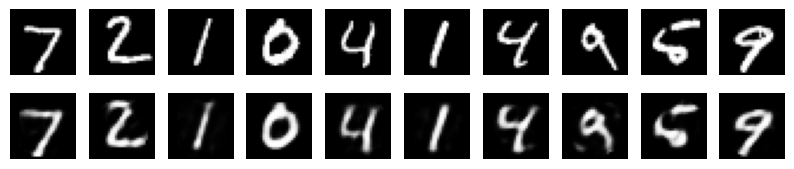

In [12]:
#Implementation of Autoencoder.
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train, x_test = x_train.reshape(-1, 784), x_test.reshape(-1, 784)

input_layer = keras.Input(shape=(784,))
encoded = keras.layers.Dense(32, activation="relu")(input_layer)
decoded = keras.layers.Dense(784, activation="sigmoid")(encoded)
autoencoder = keras.Model(input_layer, decoded)

autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, validation_data=(x_test, x_test))

reconstructed = autoencoder.predict(x_test[:10])

fig, axes = plt.subplots(2, 10, figsize=(10, 2))
for i in range(10):
    axes[0, i].imshow(x_test[i].reshape(28, 28), cmap="gray")
    axes[0, i].axis("off")
    axes[1, i].imshow(reconstructed[i].reshape(28, 28), cmap="gray")
    axes[1, i].axis("off")
plt.show()


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 144s 602ms/step - loss: 0.1246 - val_loss: 0.1140
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 148s 630ms/step - loss: 0.1118 - val_loss: 0.1140
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 137s 585ms/step - loss: 0.1123 - val_loss: 0.1140
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 135s 573ms/step - loss: 0.1121 - val_loss: 0.1140
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 129s 549ms/step - loss: 0.1118 - val_loss: 0.1140
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 138s 534ms/step - loss: 0.1122 - val_loss: 0.1140
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 124s 525ms/step - loss: 0.1121 - val_loss: 0.1140
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 526ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 526ms/step - loss: 0.1119 - val_loss: 0.1140
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 145s 538ms/step - loss: 0.1120 - val_loss: 0.1140
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


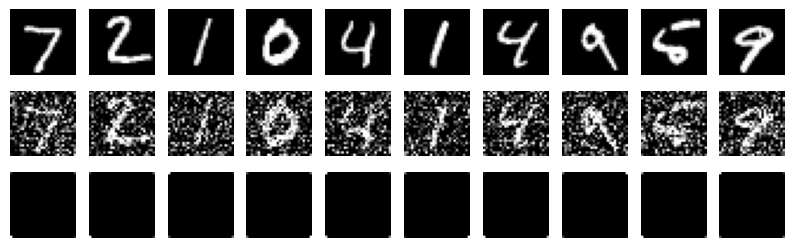

In [13]:
#7. Implement the image denoising using Convolutional Autoencoder.
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

input_layer = keras.Input(shape=(28, 28, 1))
x = keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input_layer)
x = keras.layers.MaxPooling2D((2, 2), padding="same")(x)
x = keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = keras.layers.MaxPooling2D((2, 2), padding="same")(x)

x = keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = keras.layers.UpSampling2D((2, 2))(x)
x = keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = keras.layers.UpSampling2D((2, 2))(x)
output_layer = keras.layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

autoencoder = keras.Model(input_layer, output_layer)
autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=256, validation_data=(x_test_noisy, x_test))

denoised_images = autoencoder.predict(x_test_noisy[:10])

fig, axes = plt.subplots(3, 10, figsize=(10, 3))
for i in range(10):
    axes[0, i].imshow(x_test[i].reshape(28, 28), cmap="gray")
    axes[0, i].axis("off")
    axes[1, i].imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    axes[1, i].axis("off")
    axes[2, i].imshow(denoised_images[i].reshape(28, 28), cmap="gray")
    axes[2, i].axis("off")
plt.show()


In [14]:
#. Implement the following architectures for classification of digits.
#(i) LeNet (ii) AlexNet
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

model = keras.Sequential([
    keras.layers.Conv2D(6, (5,5), activation="tanh", padding="same", input_shape=(28,28,1)),
    keras.layers.AvgPool2D((2,2), strides=2),
    keras.layers.Conv2D(16, (5,5), activation="tanh"),
    keras.layers.AvgPool2D((2,2), strides=2),
    keras.layers.Conv2D(120, (5,5), activation="tanh"),
    keras.layers.Flatten(),
    keras.layers.Dense(84, activation="tanh"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"LeNet Test Accuracy: {test_acc*100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 76ms/step - accuracy: 0.8149 - loss: 0.6194 - val_accuracy: 0.9560 - val_loss: 0.1450
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - accuracy: 0.9601 - loss: 0.1336 - val_accuracy: 0.9723 - val_loss: 0.0873
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - accuracy: 0.9752 - loss: 0.0808 - val_accuracy: 0.9786 - val_loss: 0.0650
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 78ms/step - accuracy: 0.9829 - loss: 0.0565 - val_accuracy: 0.9814 - val_loss: 0.0592
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 75ms/step - accuracy: 0.9857 - loss: 0.0438 - val_accuracy: 0.9821 - val_loss: 0.0557
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 79ms/step - accuracy: 0.9882 - loss: 0.0377 - val_accuracy: 0.9842 - val_loss: 0.0495
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 74ms/step - accuracy: 0.9913 - loss: 0.0281 - val_accuracy: 0.9857 - val_loss: 0.0423
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 77ms/step - accuracy: 0.9926 - loss: 0.0241 - 

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = tf.image.resize(x_train[..., tf.newaxis], (227, 227))
x_test = tf.image.resize(x_test[..., tf.newaxis], (227, 227))

model = keras.Sequential([
    keras.layers.Conv2D(96, (11, 11), strides=4, activation="relu", input_shape=(227, 227, 1)),
    keras.layers.MaxPool2D((3, 3), strides=2),
    keras.layers.Conv2D(256, (5, 5), padding="same", activation="relu"),
    keras.layers.MaxPool2D((3, 3), strides=2),
    keras.layers.Conv2D(384, (3, 3), padding="same", activation="relu"),
    keras.layers.Conv2D(384, (3, 3), padding="same", activation="relu"),
    keras.layers.Conv2D(256, (3, 3), padding="same", activation="relu"),
    keras.layers.MaxPool2D((3, 3), strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation="relu"),
    keras.layers.Dense(4096, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.6550 - loss: 0.9913 - val_accuracy: 0.9300 - val_loss: 0.2339
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9396 - loss: 0.2079 - val_accuracy: 0.9584 - val_loss: 0.1386
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.9578 - loss: 0.1412 - val_accuracy: 0.9552 - val_loss: 0.1536
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9637 - loss: 0.1249 - val_accuracy: 0.9649 - val_loss: 0.1214
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.9665 - loss: 0.1125 - val_accuracy: 0.9715 - val_loss: 0.1074
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.9722 - loss: 0.0930 - val_accuracy: 0.9698 - val_loss: 0.1061
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.9716 - loss: 0.0957 - val_accuracy: 0.9736 - val_loss: 0.0904
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.9756 - loss: 0.0836 - 

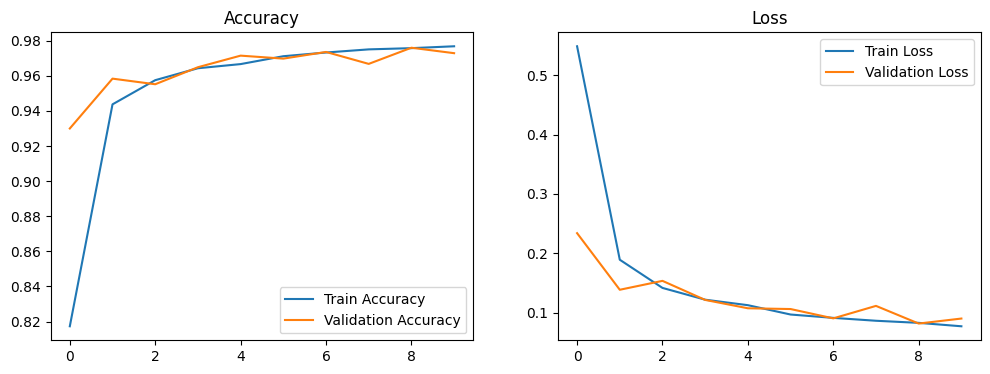

In [16]:
#Implement the Simple RNN architecture.
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
model = keras.Sequential([
    keras.layers.SimpleRNN(128, activation="relu", input_shape=(28, 28)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Simple RNN Test Accuracy: {test_acc * 100:.2f}%")
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy")
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss")
plt.show()


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 84ms/step - accuracy: 0.5810 - loss: 1.2271 - val_accuracy: 0.9396 - val_loss: 0.1932
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 85ms/step - accuracy: 0.9426 - loss: 0.1818 - val_accuracy: 0.9639 - val_loss: 0.1239
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 86ms/step - accuracy: 0.9643 - loss: 0.1175 - val_accuracy: 0.9614 - val_loss: 0.1217
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 86ms/step - accuracy: 0.9701 - loss: 0.0999 - val_accuracy: 0.9734 - val_loss: 0.0853
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 88ms/step - accuracy: 0.9760 - loss: 0.0770 - val_accuracy: 0.9812 - val_loss: 0.0614
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.9789 - loss: 0.0673 - val_accuracy: 0.9784 - val_loss: 0.0633
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 83ms/step - accuracy: 0.9819 - loss: 0.0570 - val_accuracy: 0.9779 - val_loss: 0.0720
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 84ms/step - accuracy: 0.9853 - loss: 0.0487 - 

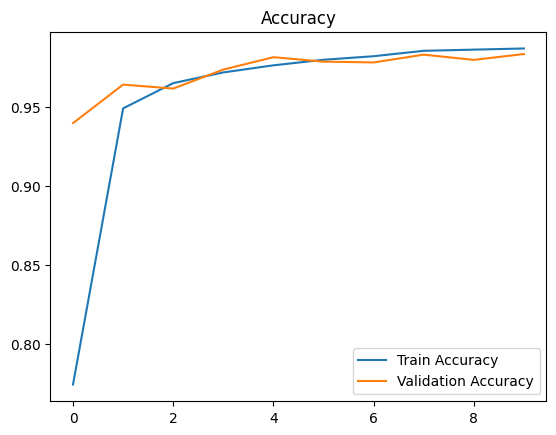

In [17]:
#Implement the LSTM architecture.
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = keras.Sequential([
    keras.layers.LSTM(128, activation="relu", input_shape=(28, 28)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy")

plt.show()
